First 5 rows:
   symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None


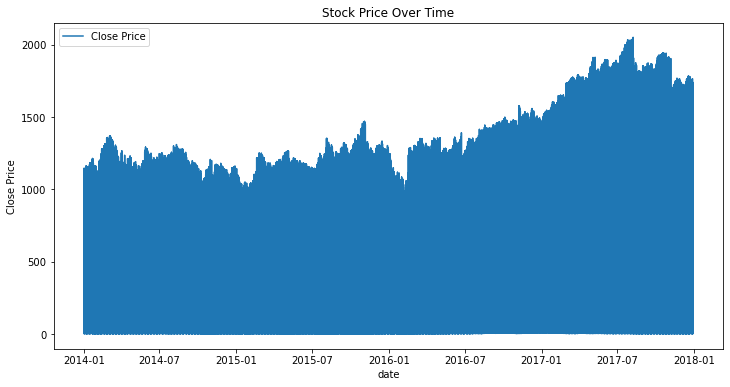

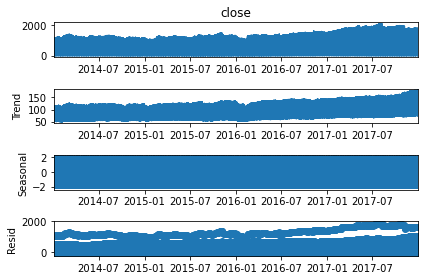

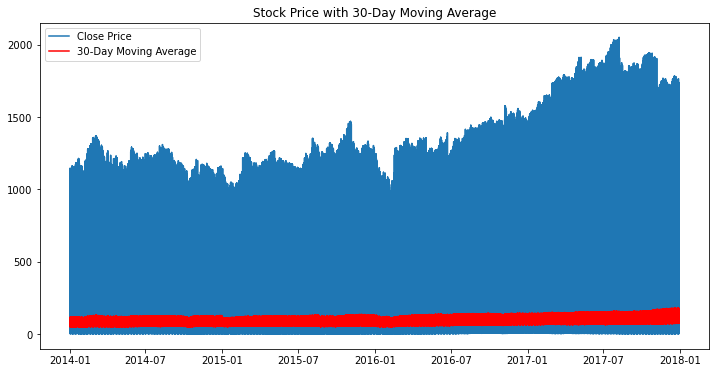

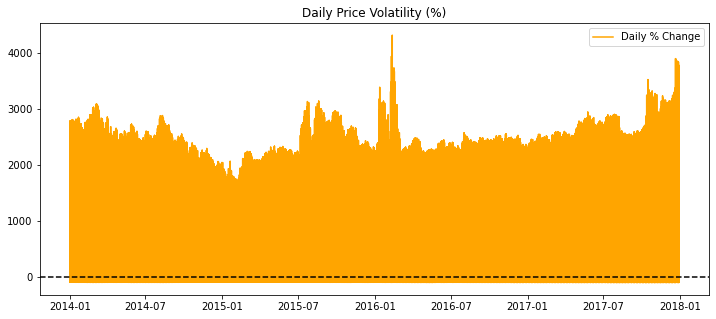

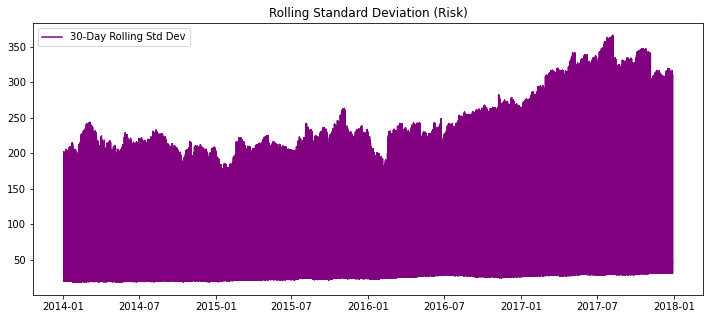

In [7]:
# 📌 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# ✅ Step 1: Load dataset
df_stock = pd.read_csv("C:/Users/ASUS/Documents/CodeVeda/Data Set For Task/2) Stock Prices Data Set.csv")

print("First 5 rows:\n", df_stock.head())
print("\nDataset Info:\n")
print(df_stock.info())

# ✅ Step 2: Convert Date column to datetime & set as index
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock = df_stock.set_index('date')

# ✅ Step 3: Basic plot of stock prices
plt.figure(figsize=(12,6))
plt.plot(df_stock['close'], label="Close Price")
plt.title("Stock Price Over Time")
plt.xlabel("date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# ✅ Step 4: Decompose Time Series
result = seasonal_decompose(df_stock['close'], model='additive', period=30)
result.plot()
plt.show()

# ✅ Step 5: Moving Average (30 days)
df_stock['30_MA'] = df_stock['close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df_stock['close'], label="Close Price")
plt.plot(df_stock['30_MA'], label="30-Day Moving Average", color='red')
plt.title("Stock Price with 30-Day Moving Average")
plt.legend()
plt.show()

# 🔥 Extra 1: Daily Volatility (% Change)
df_stock['Daily_Return'] = df_stock['close'].pct_change() * 100

plt.figure(figsize=(12,5))
plt.plot(df_stock['Daily_Return'], label="Daily % Change", color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Daily Price Volatility (%)")
plt.legend()
plt.show()

# 🔥 Extra 2: Rolling Standard Deviation (Risk)
df_stock['Rolling_Std'] = df_stock['close'].rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(df_stock['Rolling_Std'], label="30-Day Rolling Std Dev", color='purple')
plt.title("Rolling Standard Deviation (Risk)")
plt.legend()
plt.show()
